`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


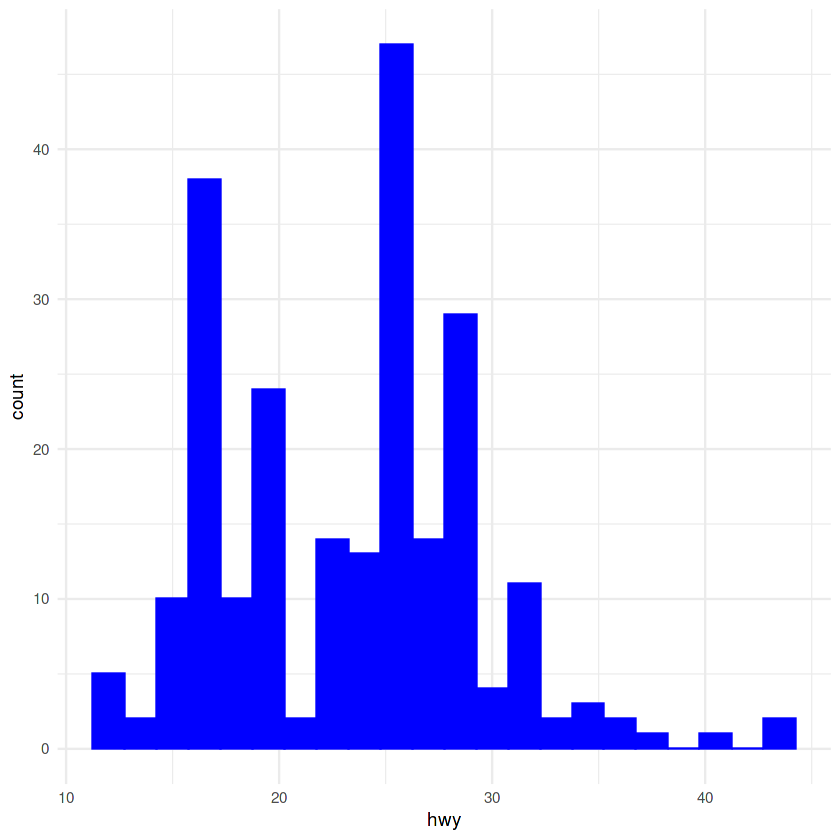

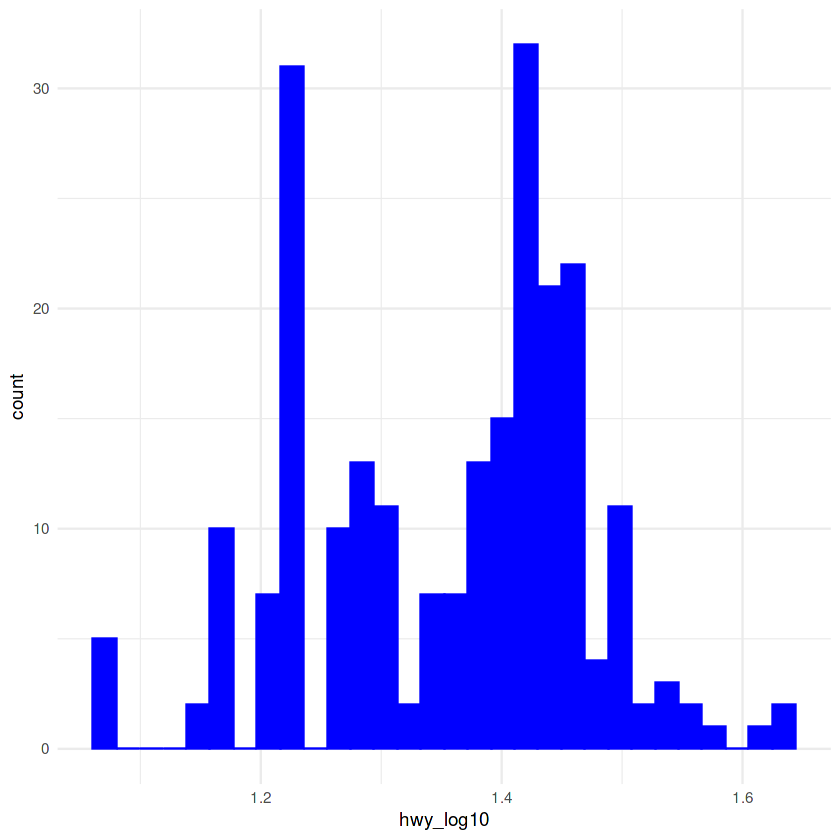

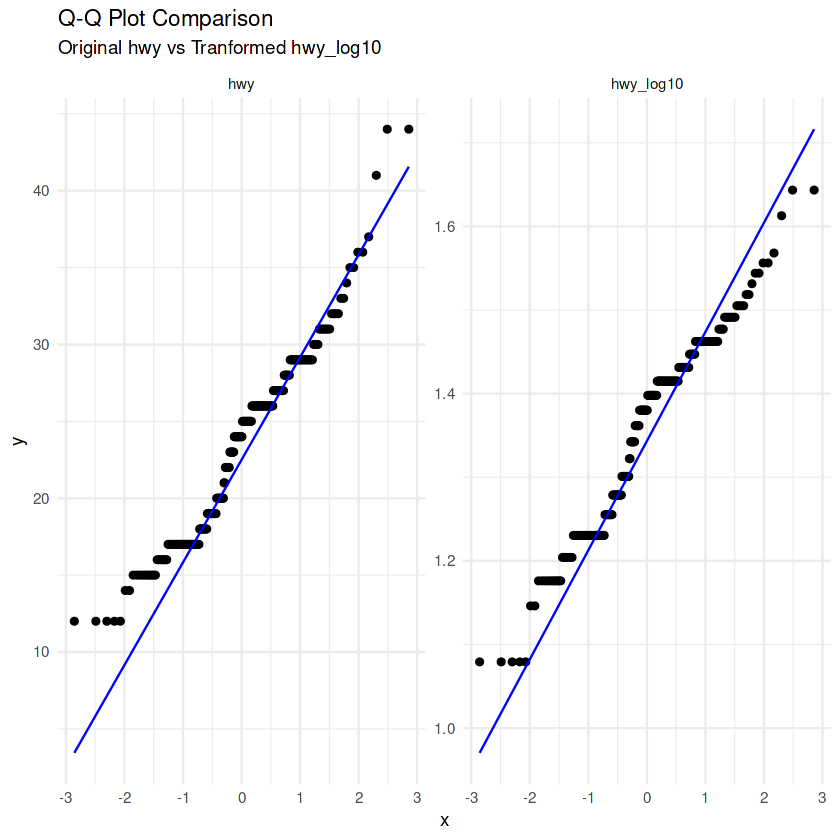

In [66]:
library(tidyverse)

# Part 1 – Data Wrangling and Transformation in R (15 points)
data <- mpg

# 1. Data Inspection (3 points)
data
slice_head(data, n = 6)

# 2. Data Wrangling and Transformation (6 points)
data_2 <- data %>%
    separate(trans, into = c("transmission_type", "num_gears"), sep = '\\(') %>% 
    mutate(num_gears = str_remove(num_gears, '\\)')) %>% # Clean num_gears column and remove ), for example, from m5).
    mutate(hwy_log10 = log10(hwy)) %>% 
    mutate(root_displ = sqrt(displ))

data_2

# Part 2 – Visualization and Interpretation (10 points)

# 1. Visualization (6 points)
# Orignial hwy column histogram
ggplot(data_2, aes(x = hwy)) +
    geom_histogram(binwidth = 1.5, color = 'blue', fill ='blue') +
    theme_minimal()

# Transformed hwy_log10 column histogram
ggplot(data_2, aes(x = hwy_log10)) +
    geom_histogram(color = 'blue', fill ='blue') +
    theme_minimal()

# QQplot
qqplot_data <- data_2 %>%
    select(hwy, hwy_log10) %>%
    pivot_longer(cols = everything(),
                names_to = 'transformation',
                values_to = 'values')

ggplot(qqplot_data, aes(sample = values)) +
    stat_qq() +
    stat_qq_line(color = 'blue') +
    facet_wrap(~transformation, scales = 'free')+
    theme_minimal() +
    labs(title = 'Q-Q Plot Comparison',
        subtitle = 'Original hwy vs Tranformed hwy_log10')



#### 2. Interpretation (4 points)
In one short paragraph, explain:
How the transformation affected the distribution of the variable (2 points)
What the Q–Q plots indicate about symmetry and normality (2 points)            
    
The log transformation compressed the data and reduced the right skewness of hwy. Additionally, the Q–Q plot for the original variable shows noticeable curvature away from the reference line, indicating right skewness and departure from normality. In contrast, the Q–Q plot of the log-transformed variable aligns more closely with the diagonal line, suggesting improved symmetry and a distribution closer to normal.

#### Part 3 – Reflection (5 points)
In 3–5 sentences, reflect on:
Why you chose the specific transformations (2 points)
Whether the transformation improved the distribution (2 points)
How this would help in future statistical modeling or regression analysis (1 point)  

The log10 transformation was chosen because the original highway mileage variable was right-skewed and contained larger values that pulled the distribution away from symmetry. Log transformations are effective at reducing skewness by compressing high values while preserving relative differences. After the transformation, the distribution appeared more balanced and closer to normal, as evidenced by the histogram and Q–Q plot. This improvement is beneficial for future statistical modeling because many regression techniques assume normality of residuals and are less sensitive to skewed predictors.